In [62]:
import pandas as pd

# 1. Importar el conjunto de datos de Población del INE:

   - Utiliza la librería Pandas para importar el archivo CSV del conjunto 9689 - "Población por provincia, sexo y edad" del sitio web del INE.

   2. Explorar y describir los datos:

   - Visualiza las primeras 10 filas del dataset para familiarizarte con la estructura y contenido de los datos.

In [63]:
df= pd.read_csv('./data/9689.csv', sep= ';')
df.head(10)
# pd.set_option('display.max_rows', None)


,Provincias,Grupo quinquenal de edad,Nacionalidad,Sexo,Periodo,Total
0,Total Nacional,Total,Total,Ambos sexos,1 de julio de 2022,"47.615.033,864697"
1,Total Nacional,Total,Total,Ambos sexos,1 de enero de 2022,"47.432.892,943294"
2,Total Nacional,Total,Total,Ambos sexos,1 de julio de 2021,"47.331.301,774407"
3,Total Nacional,Total,Total,Ambos sexos,1 de enero de 2021,"47.398.694,945392"
4,Total Nacional,Total,Total,Ambos sexos,1 de julio de 2020,"47.355.684,576847"
5,Total Nacional,Total,Total,Ambos sexos,1 de enero de 2020,"47.332.613,88819"
6,Total Nacional,Total,Total,Ambos sexos,1 de julio de 2019,"47.105.358,373156"
7,Total Nacional,Total,Total,Ambos sexos,1 de enero de 2019,"46.937.059,877999"
8,Total Nacional,Total,Total,Ambos sexos,1 de julio de 2018,"46.728.814,005226"
9,Total Nacional,Total,Total,Ambos sexos,1 de enero de 2018,"46.658.446,57237"


# 2. Explorar y describir los datos: 

   - ## Visualiza las primeras 10 filas del dataset para familiarizarte con la estructura y contenido de los datos.

   - Identifica los tipos de datos de cada columna y asegúrate de que están correctamente asignados.

   - Calcula y reporta la media, mediana, desviación estándar, y valores mínimo y máximo de las siguientes variables:

     - Población total

     - Población por sexo (masculina y femenina)

Eliminar las filas con valor invalido de 'Total'
###    - Identifica los tipos de datos de cada columna y asegúrate de que están correctamente asignados.

In [64]:
# # null_rows= df.query('Total<1')
# print(null_rows)
df.dropna(inplace= True, axis= 0)
print(df.head(10))
df.to_csv('./data/valid_df.csv', sep= ';')

       Provincias Grupo quinquenal de edad Nacionalidad         Sexo  \
0  Total Nacional                    Total        Total  Ambos sexos   
1  Total Nacional                    Total        Total  Ambos sexos   
2  Total Nacional                    Total        Total  Ambos sexos   
3  Total Nacional                    Total        Total  Ambos sexos   
4  Total Nacional                    Total        Total  Ambos sexos   
5  Total Nacional                    Total        Total  Ambos sexos   
6  Total Nacional                    Total        Total  Ambos sexos   
7  Total Nacional                    Total        Total  Ambos sexos   
8  Total Nacional                    Total        Total  Ambos sexos   
9  Total Nacional                    Total        Total  Ambos sexos   

              Periodo              Total  
0  1 de julio de 2022  47.615.033,864697  
1  1 de enero de 2022  47.432.892,943294  
2  1 de julio de 2021  47.331.301,774407  
3  1 de enero de 2021  47.398.694,9

   ### Identifica los tipos de datos de cada columna y asegúrate de que están correctamente asignados.

In [65]:
df.info()

def Eliminar_coma(st):
    try:
        st= st.replace('.','')
        pos= st.rfind(',')
        if (0<= pos):
            return int(st[0: pos])
        else:
            return int(st)
    except:
        print('________________________________________________')
        print(st)

df['Total']=df['Total'].apply(Eliminar_coma)


<class 'pandas.core.frame.DataFrame'>
Index: 1469160 entries, 0 to 1736279
Data columns (total 6 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   Provincias                1469160 non-null  object
 1   Grupo quinquenal de edad  1469160 non-null  object
 2   Nacionalidad              1469160 non-null  object
 3   Sexo                      1469160 non-null  object
 4   Periodo                   1469160 non-null  object
 5   Total                     1469160 non-null  object
dtypes: object(6)
memory usage: 78.5+ MB


In [66]:
print(df)
df.info()
pure_df = df.query('Periodo.str.contains("enero")')
#sub_df['Periodo']=df['Periodo'].apply(lambda x: x[-4:])
#sub_df
# sub_df= df.loc[(df['Periodo']== '1 de enero de 2019') | (df['Periodo']== '1 de enero de 2022')]
# sub_df.head(10)

             Provincias Grupo quinquenal de edad Nacionalidad         Sexo  \
0        Total Nacional                    Total        Total  Ambos sexos   
1        Total Nacional                    Total        Total  Ambos sexos   
2        Total Nacional                    Total        Total  Ambos sexos   
3        Total Nacional                    Total        Total  Ambos sexos   
4        Total Nacional                    Total        Total  Ambos sexos   
...                 ...                      ...          ...          ...   
1736275      52 Melilla            90 y más años    Apátridas      Mujeres   
1736276      52 Melilla            90 y más años    Apátridas      Mujeres   
1736277      52 Melilla            90 y más años    Apátridas      Mujeres   
1736278      52 Melilla            90 y más años    Apátridas      Mujeres   
1736279      52 Melilla            90 y más años    Apátridas      Mujeres   

                    Periodo     Total  
0        1 de julio de 

In [67]:
print('_________________________________________________________________________________')
total_df= pure_df.loc[(df['Provincias']== 'Total Nacional') & (df['Grupo quinquenal de edad']== 'Total') \
                 & (df['Nacionalidad']== 'Total') & (df['Sexo']=='Ambos sexos')]
temp= total_df.head(5)
print(temp)
print('_________________________________________________________________________________')
hom_df= pure_df.loc[(df['Provincias']== 'Total Nacional') & (df['Grupo quinquenal de edad']== 'Total') \
                 & (df['Nacionalidad']== 'Total') & (df['Sexo']== 'Hombres')]
temp= hom_df.head(5)
print(temp)
print('_________________________________________________________________________________')
muj_df= pure_df.loc[(df['Provincias']== 'Total Nacional') & (df['Grupo quinquenal de edad']== 'Total') \
                 & (df['Nacionalidad']== 'Total') & (df['Sexo']== 'Mujeres')]
temp= muj_df.head(5)
print(temp)
print('_________________________________________________________________________________')

_________________________________________________________________________________
       Provincias Grupo quinquenal de edad Nacionalidad         Sexo  \
1  Total Nacional                    Total        Total  Ambos sexos   
3  Total Nacional                    Total        Total  Ambos sexos   
5  Total Nacional                    Total        Total  Ambos sexos   
7  Total Nacional                    Total        Total  Ambos sexos   
9  Total Nacional                    Total        Total  Ambos sexos   

              Periodo     Total  
1  1 de enero de 2022  47432892  
3  1 de enero de 2021  47398694  
5  1 de enero de 2020  47332613  
7  1 de enero de 2019  46937059  
9  1 de enero de 2018  46658446  
_________________________________________________________________________________
        Provincias Grupo quinquenal de edad Nacionalidad     Sexo  \
43  Total Nacional                    Total        Total  Hombres   
45  Total Nacional                    Total        Total  Hom

### - Calcula y reporta la media, mediana, desviación estándar, y valores mínimo y máximo de las siguientes variables:

     - Población total

     - Población por sexo (masculina y femenina)

### Calcular los prarmetros por toda la población

In [68]:
total_media= total_df.loc[:, 'Total'].mean()
print(f'la media de total= {total_media}')
total_mediana= total_df.loc[:, 'Total'].median()
print(f'la mediana de total= {total_mediana}')
total_std= total_df.loc[:, 'Total'].std()
print(f'std de total= {total_std}')
total_max= total_df.loc[:, 'Total'].max()
print(f'max de total= {total_max}')
total_min= total_df.loc[:, 'Total'].min()
print(f'min de total= {total_min}')


la media de total= 45609439.571428575
la mediana de total= 46486621.0
std de total= 1918337.5149562072
max de total= 47432892
min de total= 41035270


### Calcular los prarmetros por las mujeres

In [69]:
muj_media= muj_df.loc[:, 'Total'].mean()
print(f'la media de mujeres= {muj_media}')
muj_mediana= muj_df.loc[:, 'Total'].median()
print(f'la mediana de mujeres= {muj_mediana}')
muj_std= muj_df.loc[:, 'Total'].std()
print(f'std de mujeres= {muj_std}')
muj_max= muj_df.loc[:, 'Total'].max()
print(f'max de mujeres= {muj_max}')
muj_min= muj_df.loc[:, 'Total'].min()
print(f'min de mujeres= {muj_min}')

la media de mujeres= 23167665.38095238
la mediana de mujeres= 23623018.0
std de mujeres= 981874.4531849007
max de mujeres= 24195741
min de mujeres= 20919749


### Calcular los prarmetros por los hombres

In [70]:
hom_media= hom_df.loc[:, 'Total'].mean()
print(f'la media de hombres= {hom_media}')
hom_mediana= hom_df.loc[:, 'Total'].median()
print(f'la mediana de hombres= {hom_mediana}')
hom_std= hom_df.loc[:, 'Total'].std()
print(f'std de hombres= {hom_std}')
hom_max= hom_df.loc[:, 'Total'].max()
print(f'max de hombres= {hom_max}')
hom_min= hom_df.loc[:, 'Total'].min()
print(f'min de hombres= {hom_min}')

la media de hombres= 22441773.714285713
la mediana de hombres= 22877461.0
std de hombres= 942764.7259211146
max de hombres= 23237151
min de hombres= 20115521


# 3. Análisis y transformaciones de datos:

   - Identifica y maneja adecuadamente cualquier valor faltante en el dataset.

   - Calcula la Tasa de Variación Anual de la Población total (*1) entre los años 2019 y 2022.

   - Genera un gráfico de líneas que muestre la evolución de la población total a lo largo del tiempo.

   - Calcula la Tasa de Dependencia Demográfica (*2) y analiza su evolución en el período 2019-2022.

   - Genera un gráfico de barras que muestre la distribución de la población por grupos de edad (0-14, 15-64, 65 y más) para el año 2022.

   - Identifica y maneja adecuadamente cualquier valor faltante en el dataset.


### (*1) Tasa de variación anual de la población

Se trata de un indicador que mide el cambio porcentual de la población entre dos períodos distintos.


Para calcular la tasa de variación anual de la población entre dos períodos hay que identificar los valores de población total en cada periodo y aplicar la siguiente fórmula. 


Tasa de variación anual = ((Población P1 - Población P2) / Población P1) * 100 

In [77]:
df_2019= pure_df.loc[(df['Provincias']== 'Total Nacional') & (df['Grupo quinquenal de edad']== 'Total') \
    & (df['Nacionalidad']== 'Total') & (df['Sexo']== 'Ambos sexos') & (df['Periodo']== '1 de enero de 2019')]
df_2022= pure_df.loc[(df['Provincias']== 'Total Nacional') & (df['Grupo quinquenal de edad']== 'Total') \
    & (df['Nacionalidad']== 'Total') & (df['Sexo']== 'Ambos sexos') & (df['Periodo']== '1 de enero de 2022')]
print(df_2019)
print(df_2022)
x1= float(df_2022['Total'])
x2= float(df_2019['Total'])
print(x1)
tva= 100*(x1- x2)/x2
print(f'tva= {tva}')


       Provincias Grupo quinquenal de edad Nacionalidad         Sexo  \
7  Total Nacional                    Total        Total  Ambos sexos   

              Periodo     Total  
7  1 de enero de 2019  46937059  
       Provincias Grupo quinquenal de edad Nacionalidad         Sexo  \
1  Total Nacional                    Total        Total  Ambos sexos   

              Periodo     Total  
1  1 de enero de 2022  47432892  
47432892.0
tva= 1.0563785004083874


/tmp/ipykernel_26597/4070122400.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x1= float(df_2022['Total'])
/tmp/ipykernel_26597/4070122400.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x2= float(df_2019['Total'])


# (*2) Tasa de dependencia demográfica

Esta tasa se representa por un porcentaje sobre la población activa o en edad de trabajar por un periodo predeterminado. Para su cálculo, debemos dividir el número de personas “dependientes” (osea las que tienen entre 0 y 14 años más los mayores de 65 años) entre el número de personas “activas” (osea que tienen entre 15 y 64 años) y representar el valor final en porcentaje.

Cuanto más elevado sea el porcentaje de la tasa de dependencia, mayor será la carga que soporta la población activa para mantener a la población que depende de ellos. Si, por el contrario, la tasa es menor, la carga para la población activa o productiva se va a reducir.

Distribución de la población de 2022

In [78]:
temp=pure_df.loc[(df['Provincias']== 'Total Nacional') & \
     (df['Nacionalidad']== 'Total') & (df['Sexo']== 'Ambos sexos') & \
        (df['Periodo']== '1 de enero de 2022')]
kids_2022= temp.loc[(temp['Grupo quinquenal de edad']== 'De 0 a 4 años') | \
                       (temp['Grupo quinquenal de edad']== 'De 5 a 9 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 10 a 14 años')]
print(kids_2022)
num_kids_2022= kids_2022['Total'].sum()

active_pplton_2022= temp.loc[(temp['Grupo quinquenal de edad']== 'De 15 a 19 años') | \
                       (temp['Grupo quinquenal de edad']== 'De 20 a 24 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 25 a 29 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 30 a 34 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 35 a 39 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 40 a 44 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 45 a 49 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 50 a 54 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 55 a 59 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 60 a 64 años')]
print(active_pplton_2022)
num_active_pplton_2022= active_pplton_2022['Total'].sum()

retired_pplton_2022= temp.loc[(temp['Grupo quinquenal de edad']== 'De 65 a 69 años') | \
                       (temp['Grupo quinquenal de edad']== 'De 70 a 74 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 75 a 79 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 80 a 84 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 85 a 89 años') |\
                        (temp['Grupo quinquenal de edad']== '90 y más años')] 
print(retired_pplton_2022)
num_retired_pplton_2022= retired_pplton_2022['Total'].sum()

print(f'número de los niños= {num_kids_2022}')
print(f'número de población activa= {num_active_pplton_2022}')
print(f'número de los jubilados= {num_retired_pplton_2022}')

          Provincias Grupo quinquenal de edad Nacionalidad         Sexo  \
1639  Total Nacional            De 0 a 4 años        Total  Ambos sexos   
3277  Total Nacional            De 5 a 9 años        Total  Ambos sexos   
4915  Total Nacional          De 10 a 14 años        Total  Ambos sexos   

                 Periodo    Total  
1639  1 de enero de 2022  1845881  
3277  1 de enero de 2022  2253408  
4915  1 de enero de 2022  2528648  
           Provincias Grupo quinquenal de edad Nacionalidad         Sexo  \
6553   Total Nacional          De 15 a 19 años        Total  Ambos sexos   
8191   Total Nacional          De 20 a 24 años        Total  Ambos sexos   
9829   Total Nacional          De 25 a 29 años        Total  Ambos sexos   
11467  Total Nacional          De 30 a 34 años        Total  Ambos sexos   
13105  Total Nacional          De 35 a 39 años        Total  Ambos sexos   
14743  Total Nacional          De 40 a 44 años        Total  Ambos sexos   
16381  Total Nacional  

Distribución de la población de 2019

In [86]:
temp=pure_df.loc[(df['Provincias']== 'Total Nacional') & \
     (df['Nacionalidad']== 'Total') & (df['Sexo']== 'Ambos sexos') & \
        (df['Periodo']== '1 de enero de 2019')]
kids_2019= temp.loc[(temp['Grupo quinquenal de edad']== 'De 0 a 4 años') | \
                       (temp['Grupo quinquenal de edad']== 'De 5 a 9 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 10 a 14 años')]
print(kids_2019)
num_kids_2019= kids_2019['Total'].sum()

active_pplton_2019= temp.loc[(temp['Grupo quinquenal de edad']== 'De 15 a 19 años') | \
                       (temp['Grupo quinquenal de edad']== 'De 20 a 24 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 25 a 29 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 30 a 34 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 35 a 39 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 40 a 44 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 45 a 49 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 50 a 54 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 55 a 59 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 60 a 64 años')]
print(active_pplton_2019)
num_active_pplton_2019= active_pplton_2019['Total'].sum()

retired_pplton_2019= temp.loc[(temp['Grupo quinquenal de edad']== 'De 65 a 69 años') | \
                       (temp['Grupo quinquenal de edad']== 'De 70 a 74 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 75 a 79 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 80 a 84 años') | \
                        (temp['Grupo quinquenal de edad']== 'De 85 a 89 años') |\
                        (temp['Grupo quinquenal de edad']== '90 y más años')] 
print(retired_pplton_2019)
num_retired_pplton_2019= retired_pplton_2019['Total'].sum()

print(f'número de los niños= {num_kids_2019}')
print(f'número de población activa= {num_active_pplton_2019}')
print(f'número de los jubilados= {num_retired_pplton_2019}')

          Provincias Grupo quinquenal de edad Nacionalidad         Sexo  \
1645  Total Nacional            De 0 a 4 años        Total  Ambos sexos   
3283  Total Nacional            De 5 a 9 años        Total  Ambos sexos   
4921  Total Nacional          De 10 a 14 años        Total  Ambos sexos   

                 Periodo    Total  
1645  1 de enero de 2019  2067503  
3283  1 de enero de 2019  2356886  
4921  1 de enero de 2019  2505728  
           Provincias Grupo quinquenal de edad Nacionalidad         Sexo  \
6559   Total Nacional          De 15 a 19 años        Total  Ambos sexos   
8197   Total Nacional          De 20 a 24 años        Total  Ambos sexos   
9835   Total Nacional          De 25 a 29 años        Total  Ambos sexos   
11473  Total Nacional          De 30 a 34 años        Total  Ambos sexos   
13111  Total Nacional          De 35 a 39 años        Total  Ambos sexos   
14749  Total Nacional          De 40 a 44 años        Total  Ambos sexos   
16387  Total Nacional  

Calcular Tasa de dependencia

In [87]:
dependency_ratio_2019= (float(num_kids_2019)+ float(num_retired_pplton_2019))/float(num_active_pplton_2019)
print(f'Tasa de dependencia por 2019= {dependency_ratio_2019}')

dependency_ratio_2022= (float(num_kids_2022)+ float(num_retired_pplton_2022))/float(num_active_pplton_2022)
print(f'Tasa de dependencia por 2022= {dependency_ratio_2022}')

Tasa de dependencia por 2019= 0.5189314309188054
Tasa de dependencia por 2022= 0.5164779949818277


Pintar los resultados

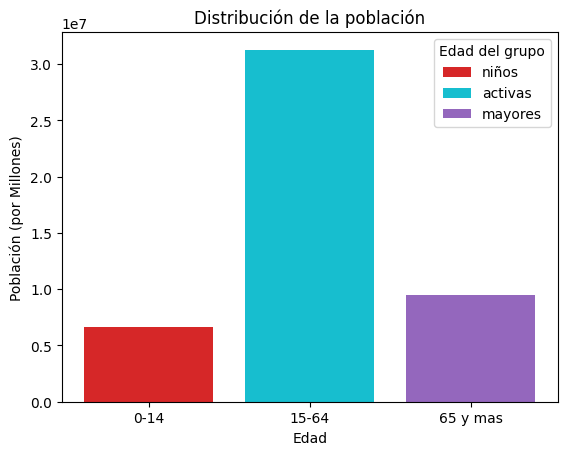

In [88]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

Edad = ['0-14', '15-64', '65 y mas']
Población = [num_kids_2022, num_active_pplton_2022, num_retired_pplton_2022]
bar_labels = ['niños', 'activas', 'mayores']
bar_colors = ['tab:red', 'tab:cyan', 'tab:purple']

ax.bar(Edad, Población, label=bar_labels, color=bar_colors)

ax.set_ylabel('Población (por Millones)')
ax.set_xlabel('Edad')
ax.set_title('Distribución de la población')
ax.legend(title='Edad del grupo')

plt.show()